In [2]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import re
import numpy as np
from collections import Counter
import seaborn as sns

from collections import defaultdict


In [3]:
#Path to groover dataset
data_path = (r'C:/Users/Deva/band_data.csv')
data_df = pd.read_csv(data_path)
data_df.head(100)

,pk,name,subgenres,biography_fr,biography_en,news_fr,news_en,country,bonus,first_submission_date,latest_submission_date,campaign_count
0,303,Polycool,"['Synthpop', 'Psychedelic pop', 'Indie pop']","Pop, Dance, Confettis, Truite, Citron, Hommes ...","Pop, Dance, Confetti, Trout, Lemon, Hooded Nud...",14 Mars aux Bains pour Les Inrocks\n28 Mars au...,"14th, March @ Bains (Paris) - Les Inrocks\n28t...",France,NaN,2018-05-01 16:14:59.059839+00:00,2019-02-28 16:20:43.954873+00:00,324
1,311,Saâne,[''],NaN,NaN,NaN,NaN,France,NaN,2018-05-02 17:15:52.557474+00:00,2018-05-02 17:15:52.561815+00:00,1
2,314,GAUMAR,[''],"La vie en jaune ! GAUMAR, révélation pop du ha...",NaN,NaN,NaN,France,NaN,2018-06-20 19:52:09.742658+00:00,2018-06-20 19:52:09.742658+00:00,1
3,315,VAGUES,"['Indie rock', 'Post-rock']","Créé en 2016, VAGUES est un groupe de rock qui...",NaN,Live Vidéo (studio session) à venir. En concer...,NaN,France,NaN,2018-05-17 19:04:11.250269+00:00,2018-07-02 19:19:00.644274+00:00,6
4,316,Ketut,"['French house', 'Minimal', 'Techno', 'Electro...",Étroit passage menant à la porte de vos rêves ...,NaN,Préparation du premier clip de Ketut ! La comm...,NaN,France,NaN,2018-05-12 16:44:43.994555+00:00,2018-10-26 14:52:44.900457+00:00,16
5,317,OAKS,['Pop rock'],Oaks est un groupe français formé en 2013 auto...,NaN,Sortie de l'album Les Matins Mauves (qui font ...,NaN,France,NaN,2018-05-06 14:45:24.155364+00:00,2018-11-01 11:36:33.167835+00:00,6
6,318,PMCP,[''],NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,0
7,319,RMZ,"['R&B', 'Soul', 'Alternative rock', 'Modern Ja...","Aux frontières du Hip-Hop, du Jazz et des musi...",NaN,La sortie du premier morceau de mon nouvel EP ...,NaN,France,NaN,2018-09-13 14:19:02.696920+00:00,2019-02-02 19:08:02.420800+00:00,56
8,320,Øllebirde,[''],"Dans leur nom, il y a des battements d’ailes e...",NaN,NaN,NaN,France,NaN,2018-05-28 21:51:10.852952+00:00,2018-06-26 10:06:04.125775+00:00,2
9,322,Whyte Sands,"['Indie pop', 'Singer-songwriter', 'Indie folk...","Nouveau groupe parisien/normand. 1er EP ""Lands...",NaN,NaN,NaN,France,NaN,2018-05-07 09:13:56.376939+00:00,2018-05-07 09:13:56.376939+00:00,5


In [4]:
data_df['genre'] = data_df['subgenres'].str.split(',')
data_df.head(100)

,pk,name,subgenres,biography_fr,biography_en,news_fr,news_en,country,bonus,first_submission_date,latest_submission_date,campaign_count,genre
0,303,Polycool,"['Synthpop', 'Psychedelic pop', 'Indie pop']","Pop, Dance, Confettis, Truite, Citron, Hommes ...","Pop, Dance, Confetti, Trout, Lemon, Hooded Nud...",14 Mars aux Bains pour Les Inrocks\n28 Mars au...,"14th, March @ Bains (Paris) - Les Inrocks\n28t...",France,NaN,2018-05-01 16:14:59.059839+00:00,2019-02-28 16:20:43.954873+00:00,324,"[['Synthpop', 'Psychedelic pop', 'Indie pop']]"
1,311,Saâne,[''],NaN,NaN,NaN,NaN,France,NaN,2018-05-02 17:15:52.557474+00:00,2018-05-02 17:15:52.561815+00:00,1,[['']]
2,314,GAUMAR,[''],"La vie en jaune ! GAUMAR, révélation pop du ha...",NaN,NaN,NaN,France,NaN,2018-06-20 19:52:09.742658+00:00,2018-06-20 19:52:09.742658+00:00,1,[['']]
3,315,VAGUES,"['Indie rock', 'Post-rock']","Créé en 2016, VAGUES est un groupe de rock qui...",NaN,Live Vidéo (studio session) à venir. En concer...,NaN,France,NaN,2018-05-17 19:04:11.250269+00:00,2018-07-02 19:19:00.644274+00:00,6,"[['Indie rock', 'Post-rock']]"
4,316,Ketut,"['French house', 'Minimal', 'Techno', 'Electro...",Étroit passage menant à la porte de vos rêves ...,NaN,Préparation du premier clip de Ketut ! La comm...,NaN,France,NaN,2018-05-12 16:44:43.994555+00:00,2018-10-26 14:52:44.900457+00:00,16,"[['French house', 'Minimal', 'Techno', 'Ele..."
5,317,OAKS,['Pop rock'],Oaks est un groupe français formé en 2013 auto...,NaN,Sortie de l'album Les Matins Mauves (qui font ...,NaN,France,NaN,2018-05-06 14:45:24.155364+00:00,2018-11-01 11:36:33.167835+00:00,6,[['Pop rock']]
6,318,PMCP,[''],NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,0,[['']]
7,319,RMZ,"['R&B', 'Soul', 'Alternative rock', 'Modern Ja...","Aux frontières du Hip-Hop, du Jazz et des musi...",NaN,La sortie du premier morceau de mon nouvel EP ...,NaN,France,NaN,2018-09-13 14:19:02.696920+00:00,2019-02-02 19:08:02.420800+00:00,56,"[['R&B', 'Soul', 'Alternative rock', 'Moder..."
8,320,Øllebirde,[''],"Dans leur nom, il y a des battements d’ailes e...",NaN,NaN,NaN,France,NaN,2018-05-28 21:51:10.852952+00:00,2018-06-26 10:06:04.125775+00:00,2,[['']]
9,322,Whyte Sands,"['Indie pop', 'Singer-songwriter', 'Indie folk...","Nouveau groupe parisien/normand. 1er EP ""Lands...",NaN,NaN,NaN,France,NaN,2018-05-07 09:13:56.376939+00:00,2018-05-07 09:13:56.376939+00:00,5,"[['Indie pop', 'Singer-songwriter', 'Indie f..."


In [5]:
list_a = list()
def split_line(text):
    a = str(text)
    words = a.split(',')
    for word in words:
        list_a.append(word)
a = data_df.genre[0:]
b= np.asarray(a)
for each in b:
    split_line(each)   
l_out = [''.join(e for e in string if e.isalnum()) for string in list_a]
#print (l_out) 
counter =  Counter(l_out)
print(type(counter))
#print(counter)
d = {}

for key, value in counter.items():
    d[key] = value
#print((d))
myDict = {key:val for key, val in d.items() if val != 1418}
size = (len(myDict))

<class 'collections.Counter'>


In [6]:
tu = [(k, v) for k, v in myDict.items()]
names = [tu[item][0] for item in range(len(tu))]
values = [tu[item][1] for item in range(len(tu))]
print((values))
print((names))

[77, 53, 185, 134, 31, 37, 40, 52, 93, 135, 97, 62, 135, 26, 158, 22, 68, 95, 89, 129, 35, 15, 43, 115, 27, 65, 62, 62, 64, 57, 92, 23, 44, 75, 64, 138, 51, 32, 25, 24, 17, 45, 51, 22, 34, 36, 25, 53, 40, 21, 45, 19, 25, 47, 13, 21, 30, 39, 37, 33, 26, 17, 27, 135, 105, 27, 27, 27, 13, 19, 23, 33, 14, 91, 19, 25, 12, 10]
['Synthpop', 'Psychedelicpop', 'Indiepop', 'Indierock', 'Postrock', 'Frenchhouse', 'Minimal', 'Techno', 'Electronica', 'Poprock', 'RB', 'Soul', 'Alternativerock', 'ModernJazz', 'Hiphop', 'Surfrock', 'Popsoul', 'Singersongwriter', 'Indiefolk', 'Electropop', 'Funk', 'ExperimentalJazz', 'Psychedelicrock', 'VariétéFrançaise', 'Experimentalrock', 'DreamPop', 'Dancemusic', 'Triphop', 'Experimental', 'Instrumental', 'Alternativehiphop', 'Latinmusic', 'Progressivepop', 'Ambient', 'Chillout', 'Rapfrançais', 'Electronicrock', 'Newwave', 'Rockandroll', 'TraditionalMusic', 'Acidhouse', 'Deephouse', 'Housemusic', 'Grunge', 'Metal', 'Britpop', 'Blues', 'Dancepop', 'Progressiverock',

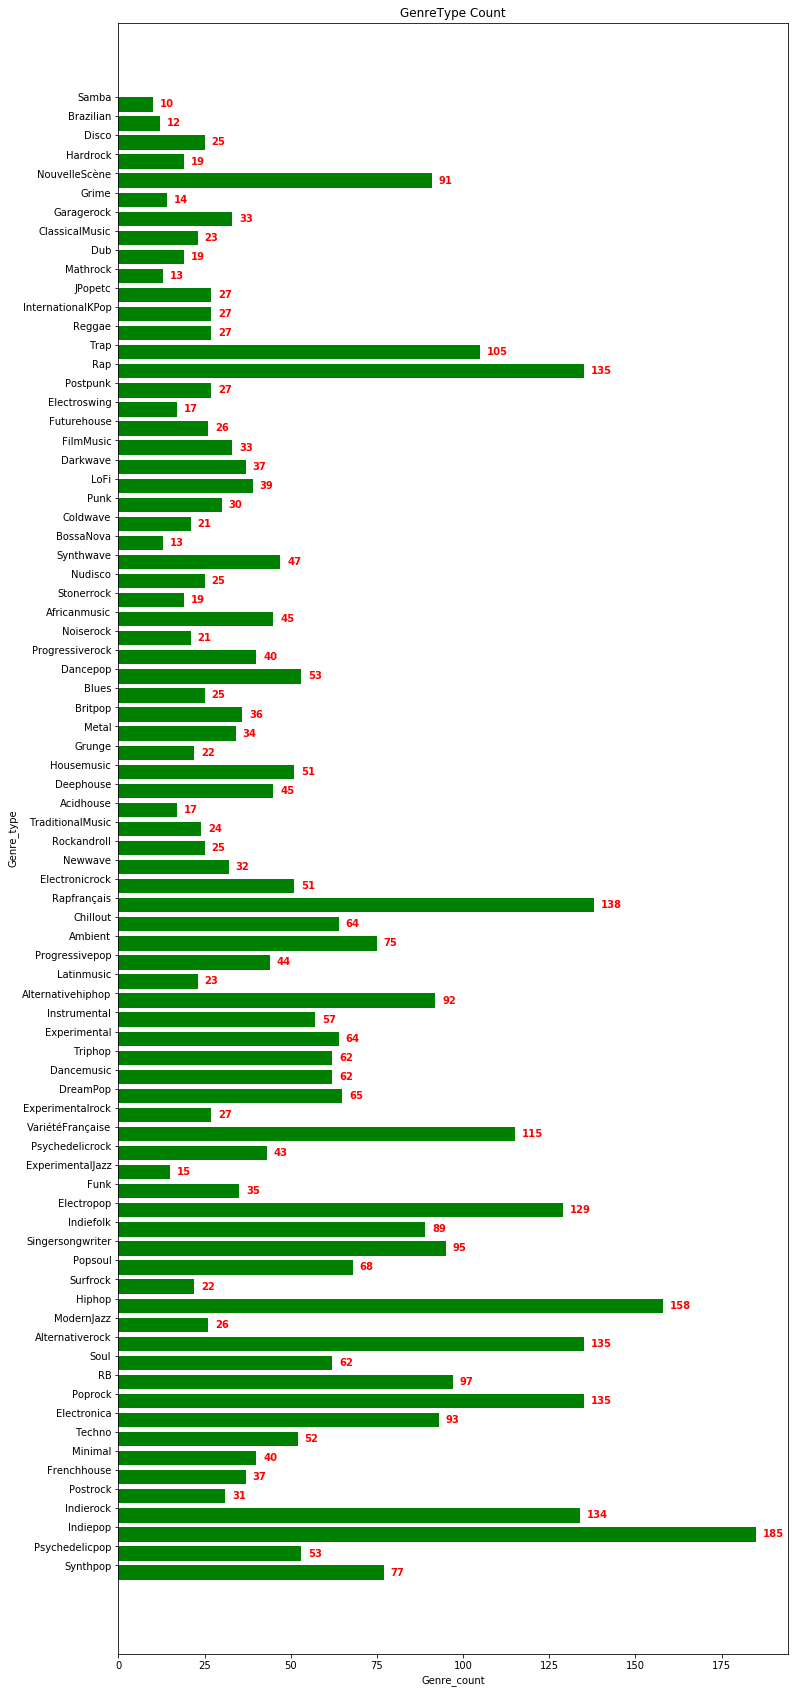

In [7]:
fig, ax = plt.subplots(figsize=(12, 30))  
width = 0.75 # the width of the bars 
ind = np.arange(len(names))  # the x locations for the groups
ax.barh(ind, values, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(names, minor=False)
plt.title('GenreType Count')
plt.xlabel('Genre_count')
plt.ylabel('Genre_type')    
for i, v in enumerate(values):
    ax.text(v+2, i -0.15 , str(v), color='red', fontweight='bold')
#plt.show()


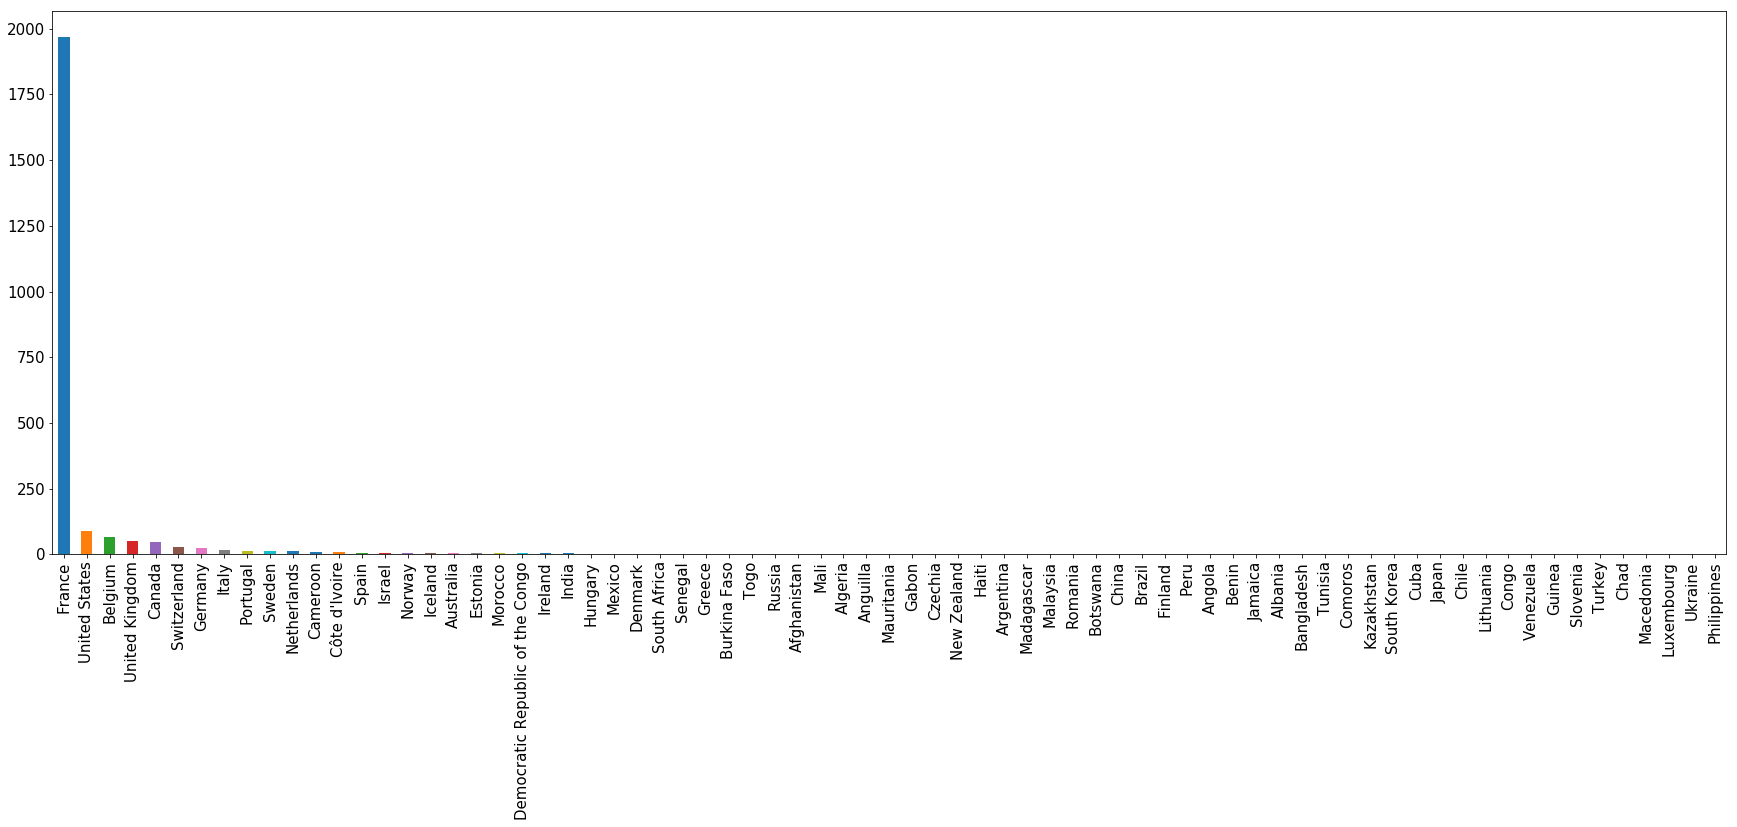

In [8]:
data_df['country'].value_counts().plot.bar(figsize=(30,10),fontsize=15)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [67]:

sub_date = data_df.iloc[:,9:10]
sub_dates = sub_date.dropna()
#sub_dates.head(100)
sub_date_l = data_df.iloc[:,10:11]
sub_dates_l = sub_date_l.dropna()
sub_dates_l.head(100)


    

,latest_submission_date
0,2019-02-28 16:20:43.954873+00:00
1,2018-05-02 17:15:52.561815+00:00
2,2018-06-20 19:52:09.742658+00:00
3,2018-07-02 19:19:00.644274+00:00
4,2018-10-26 14:52:44.900457+00:00
5,2018-11-01 11:36:33.167835+00:00
7,2019-02-02 19:08:02.420800+00:00
8,2018-06-26 10:06:04.125775+00:00
9,2018-05-07 09:13:56.376939+00:00
10,2019-02-27 16:07:51.190247+00:00


In [ ]:
sub = np.asarray(sub_dates)
sub_count = sub.size
list_sub = list()
for i in range(sub_count-1):
    res = str(sub[i])
    res1 = res[7:9]
    list_sub.append(res1)
#print(list_sub)
cou = Counter(list_sub)
print(cou)
dic = {}

for key, value in cou.items():
    dic[key] = value  
newval = {'04':0, '03':0}
dic.update(newval)

print(dic)
    

In [72]:
sub1 = np.asarray(sub_dates_l)
sub_count1 = sub.size
list_sub_l = list()
for i in range(sub_count1-1):
    res = str(sub1[i])
    res1 = res[7:9]
    list_sub_l.append(res1)
#print(list_sub)
cou1 = Counter(list_sub_l)
#print(cou1)
dic1 = {}

for key, value in cou1.items():
    dic1[key] = value  
#newval = {'04':0, '03':0}
dic1.update(newval)
print(dic)
print(dic1)

{'05': 38, '06': 86, '09': 75, '02': 306, '10': 168, '11': 178, '01': 208, '07': 44, '12': 230, '08': 37, '04': 0, '03': 0}
{'02': 428, '05': 18, '06': 50, '07': 36, '10': 130, '11': 157, '12': 226, '01': 244, '09': 52, '08': 29, '04': 0, '03': 0}


In [89]:
lis = list()
li = list()
for i in dic.keys():
    re = int(i)
    lis.append(re)
lis.sort()
di={}
dd={}
for x, y in dic.items():
    res = int(x)
    di[res] = dic[x]
  

In [90]:
lis_l = list()
li_l = list()
for i in dic1.keys():
    re = int(i)
    lis_l.append(re)
lis_l.sort()
di_l={}
dd_l={}
for x, y in dic1.items():
    res = int(x)
    di_l[res] = dic1[x]


In [76]:
for key in sorted(di.keys()):
    dd[key] = di[key]
#print(dd)
for key in sorted(di_l.keys()):
    dd_l[key] = di_l[key]
print(dd_l)
print(dd)




{1: 244, 2: 428, 3: 0, 4: 0, 5: 18, 6: 50, 7: 36, 8: 29, 9: 52, 10: 130, 11: 157, 12: 226}
{1: 208, 2: 306, 3: 0, 4: 0, 5: 38, 6: 86, 7: 44, 8: 37, 9: 75, 10: 168, 11: 178, 12: 230}


In [77]:
sb = [(k, v) for k, v in dd.items()]
s_month = [sb[item][0] for item in range(len(dd))]
s_count = [sb[item][1] for item in range(len(dd))]
print((s_month))
print((s_count))
sb_l = [(k, v) for k, v in dd_l.items()]
s_month_l = [sb_l[item][0] for item in range(len(dd_l))]
s_count_l = [sb_l[item][1] for item in range(len(dd_l))]
print((s_month_l))
print((s_count_l))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[208, 306, 0, 0, 38, 86, 44, 37, 75, 168, 178, 230]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[244, 428, 0, 0, 18, 50, 36, 29, 52, 130, 157, 226]


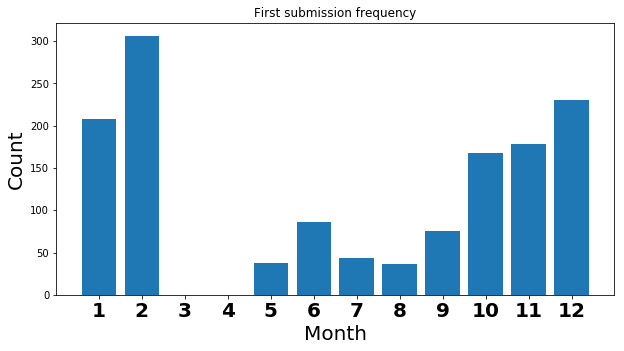

In [84]:
index = np.arange(len(s_month))
plt.figure(figsize=(10,5))
plt.bar(index, s_count)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(index, s_month, fontsize=20, rotation=0, fontweight='bold')
plt.title('First submission frequency')
plt.show()


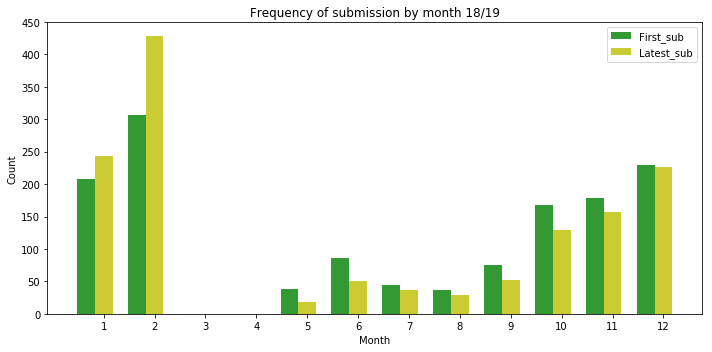

In [87]:
n_groups = 12
means_frank = s_count
means_guido = s_count_l

# create plot
fig, ax = plt.subplots(figsize=(10,5)
)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='g',
label='First_sub')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='y',
label='Latest_sub')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Frequency of submission by month 18/19')
plt.xticks(index + bar_width, ('1', '2', '3', '4','5','6',
                               '7','8','9','10','11','12'))
plt.legend()

plt.tight_layout()
plt.show()


pk                          int64
name                       object
subgenres                  object
biography_fr               object
biography_en               object
news_fr                    object
news_en                    object
country                    object
bonus                     float64
first_submission_date      object
latest_submission_date     object
campaign_count              int64
genre                      object
dtype: object